### aim: 

### date: 

In [84]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [85]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [86]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 14})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 14}

plt.rc('font', **font)

In [87]:

plt.rc('font', **font)

mod = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [88]:


def make_yearlist_tom(yrst,yren, tstr, dtype = 'diad_T'):
    print(tstr)

    dslist = []

    for y in range(yrst,yren):

        try:
            td = glob.glob(f'/gpfs/data/greenocean/software/runs/TOM12_TJ_{tstr}/*{y}0101*{dtype}*')
            dslist.append(td[0])
        except:
            pass
            print(f'FAIL {tstr}, {y}')
    return dslist


### 
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]



def get_yearly_exp_tom(tomlist, savenam):

    print(savenam)
    time1 = time.time()
    print(len(tomlist))
    exp_array = np.zeros(len(tomlist))
    year = np.zeros(len(tomlist))
    for i in range(0,len(tomlist)):
        if i%10 == 0:
            print(i)
        test = xr.open_dataset(tomlist[i]) #mol/m2/s
        siy = 60*60*24*365
        byarea = test.EXP*tmesh.csize#mol/m2/s to mol/s
        timed = byarea.sum(dim = ['y', 'x']) #mol/
        timed_mmol_day = timed.groupby('time_counter.year').mean() * siy #mean yearly export, times seconds in year # #mol/ to pG/year
        year[i] = (timed_mmol_day.year.values)
        exp_array[i] = (timed_mmol_day.values[0,9])



    data_vars = {'EXP':(['year'], exp_array,
    {'units': 'mol/yr',
    'long_name':'mol'}),
    }
    # define coordinates
    coords = {'year': (['year'], year),
            }
    # define global attributes
    attrs = {'made in':'SOZONEwindAnalyis/oceanFields/export-flux.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

    time2 = time.time()
    print(time2-time1)



In [89]:
extract = False
if extract:
    tom1A = (make_yearlist_tom(1950,2100,'1ASA', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BSA', ))
    tom2A = (make_yearlist_tom(1950,2100,'2ASA', ))
    tom2B = (make_yearlist_tom(1950,2100,'2BSA', ))
    tom3A = (make_yearlist_tom(1950,2100,'3ASA', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BSA', ))

    get_yearly_exp_tom(tom1A, './extracted-summary/EXP_tom_1ASA.nc')
    get_yearly_exp_tom(tom1B, './extracted-summary/EXP_tom_1BSA.nc')
    get_yearly_exp_tom(tom2A, './extracted-summary/EXP_tom_2ASA.nc')
    get_yearly_exp_tom(tom2B, './extracted-summary/EXP_tom_2BSA.nc')
    get_yearly_exp_tom(tom3A, './extracted-summary/EXP_tom_3ASA.nc')
    get_yearly_exp_tom(tom3B, './extracted-summary/EXP_tom_3BSA.nc')

In [90]:
extract = False
if extract:
    tom1A = (make_yearlist_tom(1950,2100,'1AA3', ))
    tom1B = (make_yearlist_tom(1950,2100,'1BA3', ))
    tom2A = (make_yearlist_tom(1950,2100,'2AA3', ))
    tom2B = (make_yearlist_tom(1950,2100,'2BA3', ))
    tom3A = (make_yearlist_tom(1950,2100,'3AA3', ))
    tom3B = (make_yearlist_tom(1950,2100,'3BA3', ))

    get_yearly_exp_tom(tom1A, './extracted-summary/EXP_tom_1AA3.nc')
    get_yearly_exp_tom(tom1B, './extracted-summary/EXP_tom_1BA3.nc')
    get_yearly_exp_tom(tom2A, './extracted-summary/EXP_tom_2AA3.nc')
    get_yearly_exp_tom(tom2B, './extracted-summary/EXP_tom_2BA3.nc')
    get_yearly_exp_tom(tom3A, './extracted-summary/EXP_tom_3AA3.nc')
    get_yearly_exp_tom(tom3B, './extracted-summary/EXP_tom_3BA3.nc')

### a timeseries of yearly export at 100m - the new model has much less export, and it's not reactive to 

Text(0.5, 1.0, 'Yearly export at 100m \n (CAL12 in full line, old 2022 DW model in dotted line)')

<Figure size 432x288 with 0 Axes>

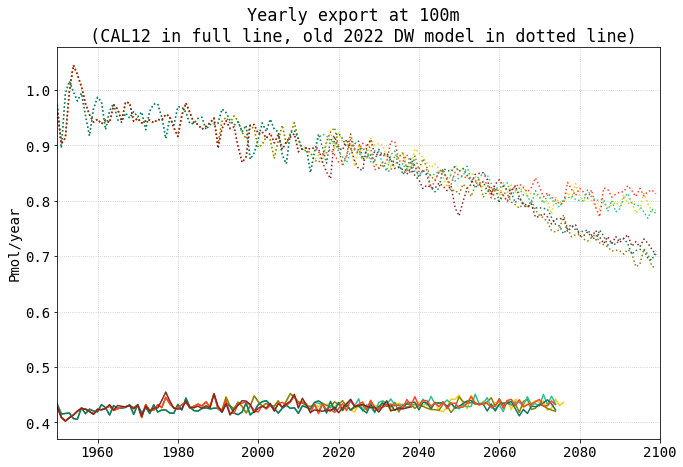

In [91]:
plt.rcParams.update({'font.size': 14})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 14}

plt.rc('font', **font)

plt.figure()

models = ['1A','1B','2A','2B','3A','3B',\
         ]

fact = 0.9
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
#axs = axs.ravel()

for i in range(0,6):#len(models)):

    
    tmod = xr.open_dataset(f'./extracted-summary/EXP_tom_{models[i]}SA.nc')
    axs.plot(tmod.year,tmod.EXP * 1e-15, color = mod[models[i]]['color'], linestyle = ':',\
             label = mod[models[i]]['name'])
    
    tmod = xr.open_dataset(f'./extracted-summary/EXP_tom_{models[i]}A3.nc')
    axs.plot(tmod.year,tmod.EXP * 1e-15, color = mod[models[i]]['color'], \
             label = mod[models[i]]['name'])

axs.set_ylabel('Pmol/year')
axs.grid(linestyle = ':', color = 'grey', alpha = 0.5)
axs.set_xlim([1950,2100])
axs.set_title('Yearly export at 100m \n (CAL12 in full line, old 2022 DW model in dotted line)')

In [92]:
tom1ASA = xr.open_mfdataset(make_yearlist_tom(2060,2065,'1ASA'))
tom1AA3 = xr.open_mfdataset(make_yearlist_tom(2060,2065,'1AA3'))

1ASA
1AA3


### colorbars left to do their own thing

the old 

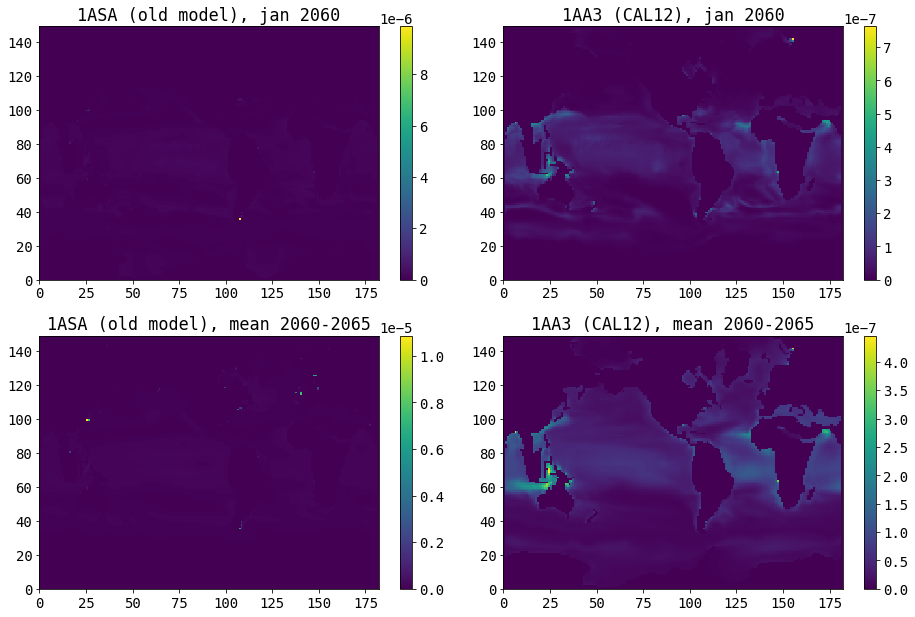

In [93]:
fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolormesh(tom1ASA.EXP.isel(deptht = 9).isel(time_counter = 0))
plt.colorbar(w, ax = axs[0])
axs[0].set_title('1ASA (old model), jan 2060')
w = axs[1].pcolormesh(tom1AA3.EXP.isel(deptht = 9).isel(time_counter = 0))
plt.colorbar(w, ax = axs[1])
axs[1].set_title('1AA3 (CAL12), jan 2060')

w = axs[2].pcolormesh(tom1ASA.EXP.isel(deptht = 9).mean(dim = 'time_counter'))#(time_counter = 0))
plt.colorbar(w, ax = axs[2])
axs[2].set_title('1ASA (old model), mean 2060-2065')

w = axs[3].pcolormesh(tom1AA3.EXP.isel(deptht = 9).mean(dim = 'time_counter'))
plt.colorbar(w, ax = axs[3])
axs[3].set_title('1AA3 (CAL12), mean 2060-2065')

plt.tight_layout()

### colorbars all standardized

the new model truly just has much less export than the old one. 

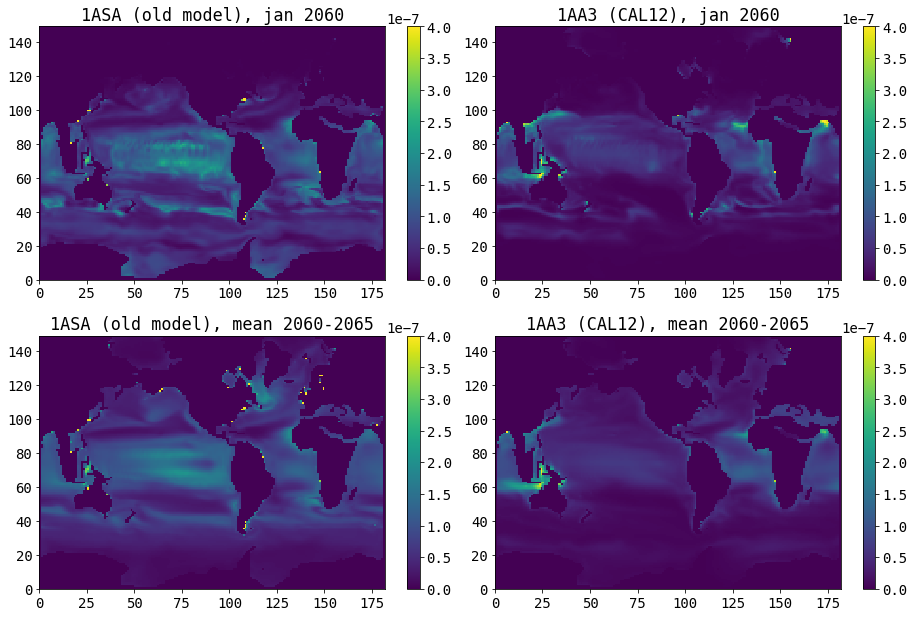

In [94]:
tvmin = 0
tvmax = 4e-7
fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolormesh(tom1ASA.EXP.isel(deptht = 9).isel(time_counter = 0), vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[0])
axs[0].set_title('1ASA (old model), jan 2060')
w = axs[1].pcolormesh(tom1AA3.EXP.isel(deptht = 9).isel(time_counter = 0), vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[1])
axs[1].set_title('1AA3 (CAL12), jan 2060')

w = axs[2].pcolormesh(tom1ASA.EXP.isel(deptht = 9).mean(dim = 'time_counter'), vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[2])
axs[2].set_title('1ASA (old model), mean 2060-2065')

w = axs[3].pcolormesh(tom1AA3.EXP.isel(deptht = 9).mean(dim = 'time_counter'), vmin = tvmin, vmax = tvmax)
plt.colorbar(w, ax = axs[3])
axs[3].set_title('1AA3 (CAL12), mean 2060-2065')

plt.tight_layout()